# Import Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
#from feature_cleaning import outlier as ot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.neighbors import KNeighborsRegressor

from sklearn import svm 
from sklearn.svm import SVR

from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import RandomizedSearchCV
import random
from scipy.stats import uniform

## 1. Read the dataset into the notebook


In [2]:
df = pd.read_excel('Concrete_Data.xls')

## 2. Print the shape of the data

In [3]:
#shape of the data
df.shape

(1030, 9)

In [4]:
#Head of the data

df.head()


Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

## 3. List out the feature variables and their data-types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

## Replace Dataseat columnns Name

In [7]:
df['Cement'] = df['Cement (component 1)(kg in a m^3 mixture)']
df['Blast'] = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']
df['fly'] = df['Fly Ash (component 3)(kg in a m^3 mixture)']
df['water'] = df['Water  (component 4)(kg in a m^3 mixture)']
df['Superplasticizer'] = df['Superplasticizer (component 5)(kg in a m^3 mixture)']
df['coarse'] = df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)']
df['Fine_Aggregate'] = df['Fine Aggregate (component 7)(kg in a m^3 mixture)']
df['age'] = df['Age (day)']
df['Concrete'] = df['Concrete compressive strength(MPa, megapascals) ']

### Drop The Columns

In [8]:
df = df.drop(columns = (['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) ']))

In [9]:
df.head()

Cement  Blast  fly  water  Superplasticizer  coarse  Fine_Aggregate  age  \
0   540.0    0.0  0.0  162.0               2.5  1040.0           676.0   28   
1   540.0    0.0  0.0  162.0               2.5  1055.0           676.0   28   
2   332.5  142.5  0.0  228.0               0.0   932.0           594.0  270   
3   332.5  142.5  0.0  228.0               0.0   932.0           594.0  365   
4   198.6  132.4  0.0  192.0               0.0   978.4           825.5  360   

    Concrete  
0  79.986111  
1  61.887366  
2  40.269535  
3  41.052780  
4  44.296075

## 5. Check for null values in the feature variables

In [10]:
df.isnull().sum()

Cement              0
Blast               0
fly                 0
water               0
Superplasticizer    0
coarse              0
Fine_Aggregate      0
age                 0
Concrete            0
dtype: int64

### 6. Check for outliers


## 7. Treat outliers. What is your strategy? What other strategies can be used?

### Performing univariate analysis Outlier detection and removal using percentile

In [11]:
df.columns

Index(['Cement', 'Blast', 'fly', 'water', 'Superplasticizer', 'coarse',
       'Fine_Aggregate', 'age', 'Concrete'],
      dtype='object')

In [12]:
#Q1 = df['Concrete'].quantile(0.01)
#Q3 = df['Concrete'].quantile(0.99)

#IQR= Q3-Q1
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR

#print(Q1,Q3)
#print(lower_limit,upper_limit)

#df_1 = df[(df['Concrete']>lower_limit) | (df['Concrete']<upper_limit)]
#df_1.shape

In [13]:
#index,para = ot.outlier_detect_IQR(data=df,col='Concrete',threshold=5)
#print('Upper bound:',para[0],'\nLower bound:',para[1])

<AxesSubplot:xlabel='Concrete', ylabel='Density'>

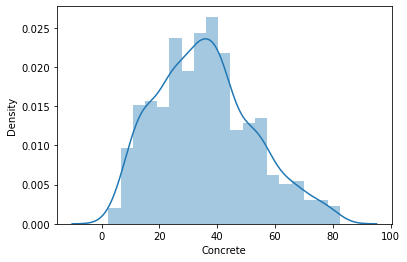

In [14]:
sns.distplot(df['Concrete'])

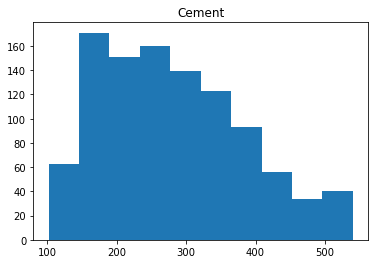

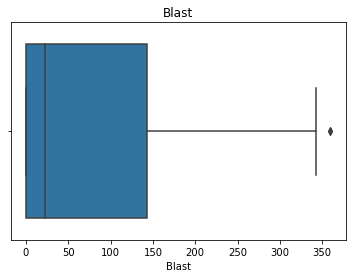

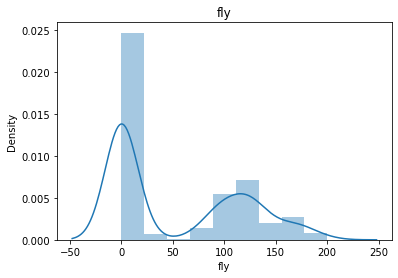

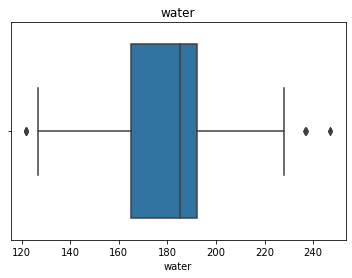

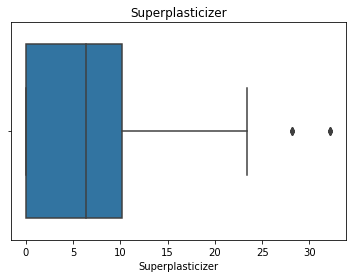

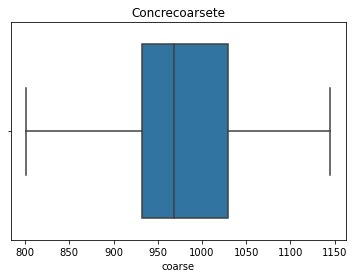

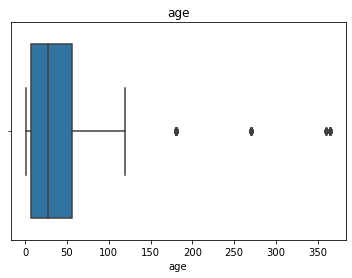

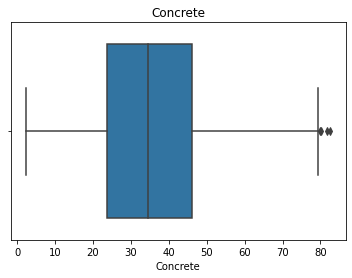

In [15]:
#before Cleaning outliers
plt.hist(df['Cement'])
plt.title('Cement')
plt.show()

sns.boxplot(df['Blast'])
plt.title('Blast')
plt.show()

sns.distplot(df['fly'])
plt.title('fly')
plt.show()

sns.boxplot(df['water'])
plt.title('water')
plt.show()

sns.boxplot(df['Superplasticizer'])
plt.title('Superplasticizer')
plt.show()

sns.boxplot(df['coarse'])
plt.title('Concrecoarsete')
plt.show()

sns.boxplot(df['age'])
plt.title('age')
plt.show()

sns.boxplot(df['Concrete'])
plt.title('Concrete')
plt.show()


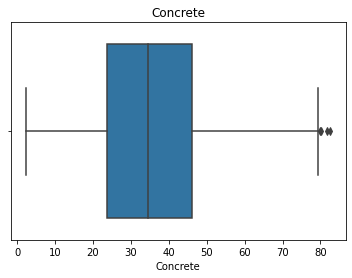

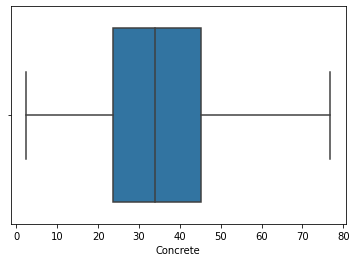

In [16]:
#before Cleaning outliers

sns.boxplot(df['Concrete'])
plt.title('Concrete')
plt.show()

#Cleaning outliers
Concrete_1 = df['Concrete'].quantile(0.99)
df_1 = df[df['Concrete']<Concrete_1]

#After Cleaning outliers
sns.boxplot(df_1['Concrete'])
plt.show()

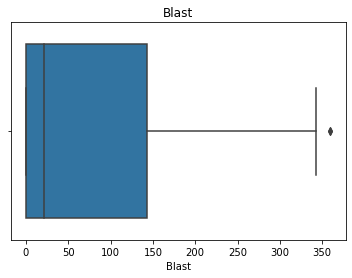

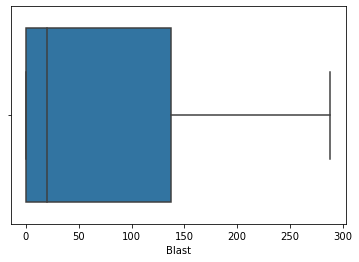

In [17]:
#before Cleaning outliers
sns.boxplot(df_1['Blast'])
plt.title('Blast')
plt.show()

#Cleaning outliers
Blast_1 = df_1['Blast'].quantile(0.99)
df_2 = df_1[df_1['Blast']<Blast_1]

#After Cleaning outliers
sns.boxplot(df_2['Blast'])
plt.show()

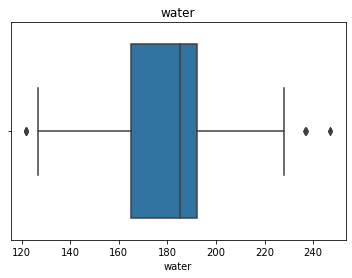

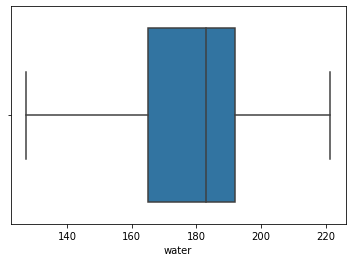

In [18]:
#before Cleaning outliers
sns.boxplot(df_2['water'])
plt.title('water')
plt.show()

#Cleaning outliers
lower = df_2['water'].quantile(0.01)
upper = df_2['water'].quantile(0.99)

df_3 = df_2[(df_2['water']>lower) & (df_2['water']<upper)]

#After Cleaning outliers
sns.boxplot(df_3['water'])
plt.show()

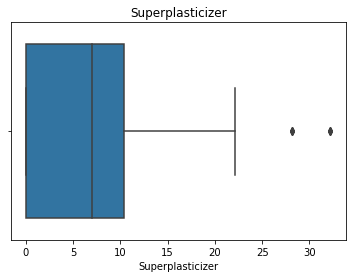

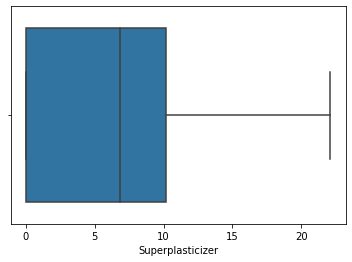

In [19]:
#before Cleaning outliers
sns.boxplot(df_3['Superplasticizer'])
plt.title('Superplasticizer')
plt.show()

#Cleaning outliers

Superplasticizer_1 = df_3['Superplasticizer'].quantile(0.99)
df_4 = df_3[df_3['Superplasticizer']<Superplasticizer_1]

#After Cleaning outliers
sns.boxplot(df_4['Superplasticizer'])
plt.show()

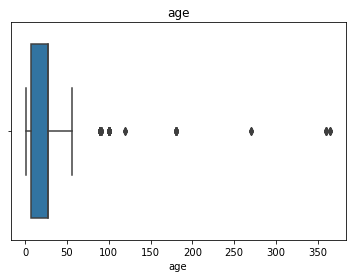

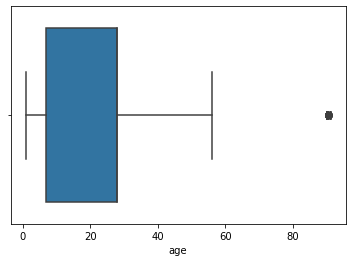

In [20]:
#before Cleaning outliers
sns.boxplot(df_4['age'])
plt.title('age')
plt.show()

#Cleaning outliers
age_1 = df_4['age'].quantile(0.95)
df_cleaned = df_4[df_4['age']<age_1]

#After Cleaning outliers

sns.boxplot(df_cleaned['age'])
plt.show()


In [21]:
df_cleaned.columns

Index(['Cement', 'Blast', 'fly', 'water', 'Superplasticizer', 'coarse',
       'Fine_Aggregate', 'age', 'Concrete'],
      dtype='object')

## Checking correlation matrices using heatmap

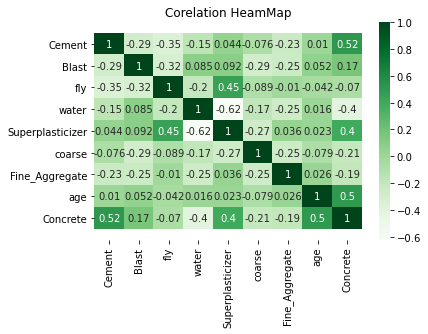

In [22]:
corr = df_cleaned.corr()

sns.heatmap(corr, annot = True , cmap = 'Greens')
b, t = plt.ylim()
plt.ylim(b+0.5,t-0.5)
plt.title('Corelation HeamMap')
plt.show()

### bi-variate analysis

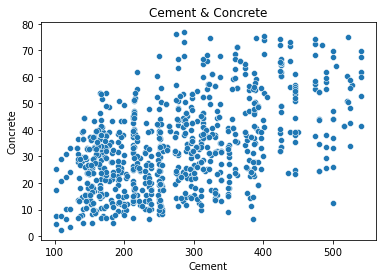

In [23]:
sns.scatterplot(x = 'Cement', y = 'Concrete', data = df_cleaned )
plt.title('Cement & Concrete')
plt.show()

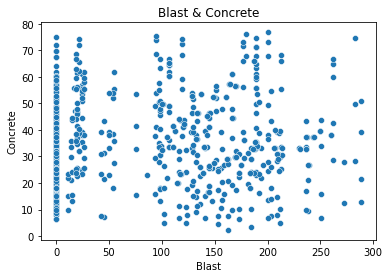

In [24]:
#sns.scatterplot(x = 'Blast',y = 'Concrete', data = df_cleaned )
sns.scatterplot(x = 'Blast', y = 'Concrete', data = df_cleaned)
plt.title('Blast & Concrete')
plt.show()

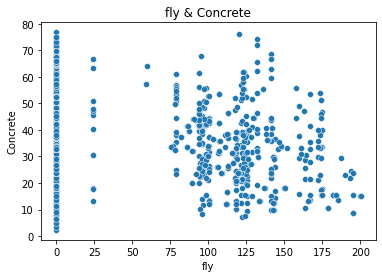

In [25]:
sns.scatterplot(x = 'fly', y = 'Concrete', data = df_cleaned)
plt.title('fly & Concrete')
plt.show()

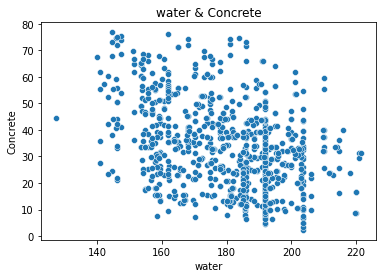

In [26]:
sns.scatterplot(x = 'water', y = 'Concrete', data = df_cleaned )
plt.title('water & Concrete')
plt.show()

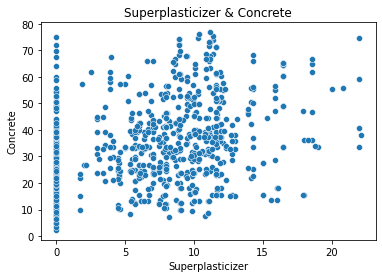

In [27]:
sns.scatterplot(x = 'Superplasticizer', y = 'Concrete', data = df_cleaned )
plt.title('Superplasticizer & Concrete')
plt.show()

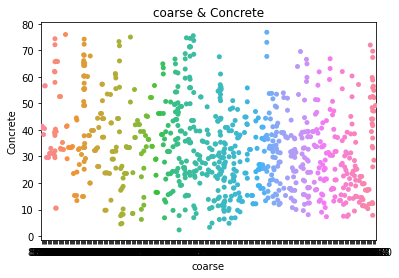

In [28]:
sns.swarmplot(x = 'coarse', y = 'Concrete', data = df_cleaned )
plt.title('coarse & Concrete')
plt.show()

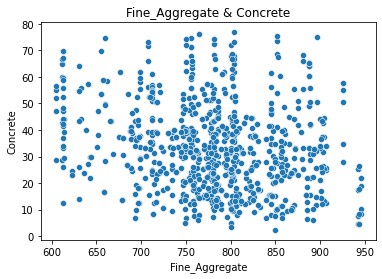

In [29]:
sns.scatterplot(x = 'Fine_Aggregate', y = 'Concrete', data = df_cleaned )
plt.title('Fine_Aggregate & Concrete')
plt.show()

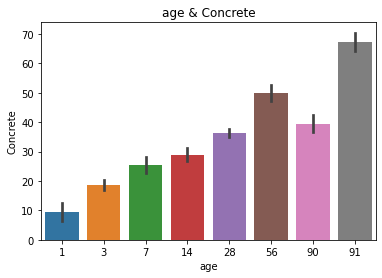

In [30]:
sns.barplot(x = 'age', y = 'Concrete', data = df_cleaned )
plt.title('age & Concrete')
plt.show()

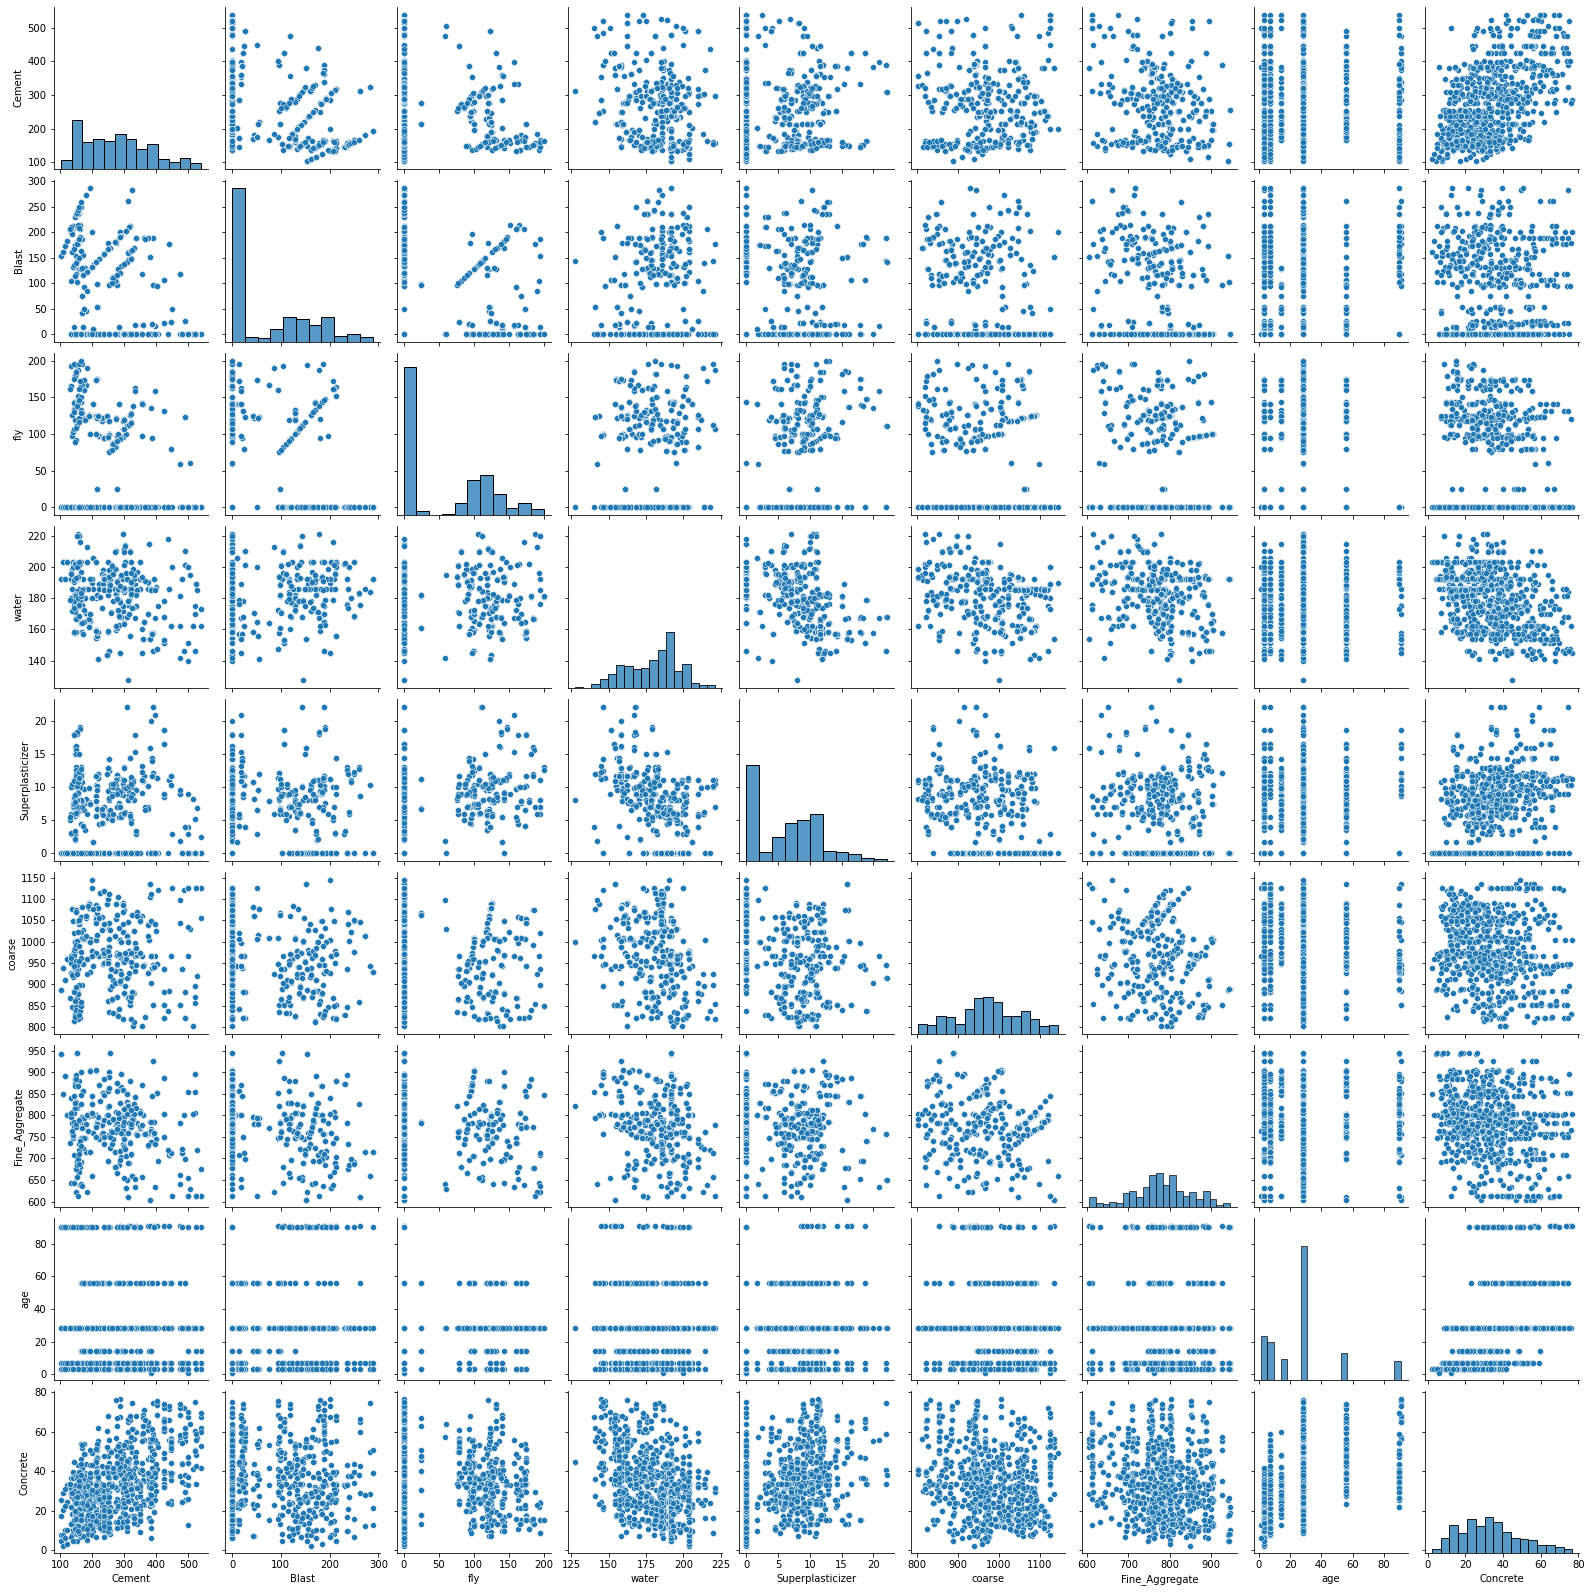

In [31]:
sns.pairplot(df_cleaned)
plt.show()

## *-------------------------------------------------------------------------------------------------------------------------------*

### What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?
Ans : For This dataset we need to use Supervised Because supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not.

## *-------------------------------------------------------------------------------------------------------------------------------*

### What is the category of the machine learning problem at hand? (Classification or Regression?) Why
Ans : For This dataset we need to use Regression Because That regression is the problem of predicting a continuous quantity output.So This dataset our dependent variable is in continuous Methode

## *-------------------------------------------------------------------------------------------------------------------------------*

#### Perform below algorithms:
- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor
- KNN Regressor
- SVM Regresso



    

#### Pick each of the algorithm and perform the below steps:

   * Split your data between train and test steps. 
    
   * Build your model

   * List down the evaluation metrics you would use to evaluate the performance of the model?

   * Evaluate the model on training data
  
   * Predict the response variables for the test data
  
   * How are the two scores? Are they significantly different? Are they the same? 
      Is the test score better than training score?
    
   * Perform hyper parameter tuning and cross validation techniques.
    
   * Evaluate the model on test data.


## *-------------------------------------------------------------------------------------------------------------------------------*

### Split The Dataset into Train and Test using Sklearn

In [32]:
df_cleaned.shape

(842, 9)

In [33]:
#split dependent variables and independent variables
X = df_cleaned.drop(columns = 'Concrete',axis=1)
Y = df_cleaned['Concrete']

In [34]:
X.head()

Cement  Blast  fly  water  Superplasticizer  coarse  Fine_Aggregate  age
1    540.0    0.0  0.0  162.0               2.5  1055.0           676.0   28
10   198.6  132.4  0.0  192.0               0.0   978.4           825.5   90
11   198.6  132.4  0.0  192.0               0.0   978.4           825.5   28
16   139.6  209.4  0.0  192.0               0.0  1047.0           806.9   90
21   139.6  209.4  0.0  192.0               0.0  1047.0           806.9   28

In [35]:
Y

1       61.887366
10      38.074244
11      28.021684
16      39.358048
21      28.237490
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete, Length: 842, dtype: float64

In [36]:
#X_train & Y_train split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=40)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(589, 8) (253, 8)
(589,) (253,)


## Linear Regression

In [37]:
#Linear Regression model
lm = LinearRegression()
#Linear Regression model fitting
lm_fit = lm.fit(x_train,y_train)
lm_fit

LinearRegression()

In [38]:
print('intercept : ' , lm_fit.intercept_)
print('coefficient : ' , lm_fit.coef_)


intercept :  17.734685661638345
coefficient :  [ 0.11587829  0.09428356  0.07599736 -0.26242917  0.0595708   0.00420292
  0.0079443   0.34254428]


In [39]:
# Predict The x_test Data
y_pred_lm = lm_fit.predict(x_test)

In [40]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_lm :',(y_pred_lm)[i],'|***|','y_test - y_pred_lm :',list(y_test)[i]-y_pred_lm[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_lm : 14.39601824271751 |***| y_test - y_pred_lm : 2.879492413282488
y_test : 9.307926 |***| y_pred_lm : 7.158788078002583 |***| y_test - y_pred_lm : 2.1491379219974167
y_test : 31.11605188 |***| y_pred_lm : 30.280889029769934 |***| y_test - y_pred_lm : 0.8351628502300663
y_test : 13.18278112 |***| y_pred_lm : 18.06435341112793 |***| y_test - y_pred_lm : -4.881572291127929
y_test : 27.53077668 |***| y_pred_lm : 22.770931052810933 |***| y_test - y_pred_lm : 4.7598456271890655
y_test : 34.77027468 |***| y_pred_lm : 42.782151512330856 |***| y_test - y_pred_lm : -8.011876832330856
y_test : 33.306517131999996 |***| y_pred_lm : 37.185791814222526 |***| y_test - y_pred_lm : -3.8792746822225297
y_test : 14.2032056 |***| y_pred_lm : 14.966261129043186 |***| y_test - y_pred_lm : -0.7630555290431857
y_test : 33.71882378 |***| y_pred_lm : 33.23780028794994 |***| y_test - y_pred_lm : 0.48102349205006334
y_test : 61.887365759999994 |***| y_pred_lm : 57.3400335

y_test : 24.290928956 |***| y_pred_lm : 15.85048965080105 |***| y_test - y_pred_lm : 8.440439305198948
y_test : 23.744174488 |***| y_pred_lm : 23.581555179086756 |***| y_test - y_pred_lm : 0.16261930891324283
y_test : 71.29871315999999 |***| y_pred_lm : 54.554240838139194 |***| y_test - y_pred_lm : 16.744472321860798
y_test : 27.827251359999998 |***| y_pred_lm : 23.708921093393354 |***| y_test - y_pred_lm : 4.118330266606645
y_test : 12.17614616 |***| y_pred_lm : 16.2925763853253 |***| y_test - y_pred_lm : -4.116430225325301
y_test : 10.76272036 |***| y_pred_lm : 15.02233633048043 |***| y_test - y_pred_lm : -4.25961597048043
y_test : 33.72916592 |***| y_pred_lm : 28.795862659715294 |***| y_test - y_pred_lm : 4.933303260284706
y_test : 51.72448952 |***| y_pred_lm : 42.910461721588206 |***| y_test - y_pred_lm : 8.814027798411793
y_test : 75.49762199999999 |***| y_pred_lm : 77.1404779465856 |***| y_test - y_pred_lm : -1.6428559465856125
y_test : 32.068218236 |***| y_pred_lm : 42.616736390

In [41]:
#Overfitting (train set score is much Higher)
#Linear Regression model metrics

mse = mean_squared_error (y_test, y_pred_lm)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_lm))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')
print ("training set score :", lm_fit.score(x_train, y_train))
print ("test set score :", lm_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.7523410705644032
RMSE : 7.920781299797535
mse : 62.73877639922233
training set score : 0.7838923700526783
test set score : 0.7523410705644032


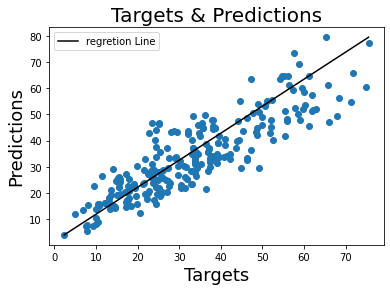

In [42]:
# Plot Targets & Predictions

plt.scatter(y_test, y_pred_lm)
plt.plot([y_test.min(),y_test.max()],[y_pred_lm.min(),y_pred_lm.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

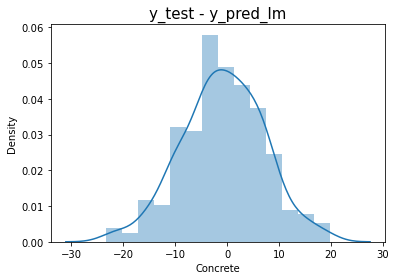

In [43]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_lm)
plt.title('y_test - y_pred_lm',size=15)
plt.show()

### K-Fold Method For Linear Regression

In [47]:
kf_lm= KFold(n_splits=5)
kfold_score_lm = cross_val_score(lm,X,Y,cv=kf_lm)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_lm)
print('=======================================')

kfold_score_mean_lm = kfold_score_lm.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_lm))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_lm))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_lm)
print('=======================================')

The cross validation scores of k-fold method with 5 folds is [0.76635666 0.57123794 0.75162754 0.74780669 0.56774672]
The min accuracy from k-fold CV is min 0.5677467156721914
The max accuracy from k-fold CV is max 0.766356664179287
The mean cross validation scores of k-fold method with 5 folds is 0.6809551085735583


In [48]:
#complete implementation of k-fold cross validation
kf_2_lm=KFold(n_splits=5)
acc_score_kfold_lm = []

for train_index1,test_index1 in kf_2_lm.split(X,Y):
    
    X_train1,X_test1 = X.iloc[train_index1,:], X.iloc[test_index1,:]
    Y_train1,Y_test1 = Y.iloc[train_index1], Y.iloc[test_index1]
# create and fit     
lm_model_fit_kf = lm.fit(X_train1,Y_train1)  
pred_values_lm1 = lm_model_fit_kf.predict(X_test1)
#r2_score
acc_1 = r2_score(pred_values_lm1,Y_test1)
acc_score_kfold_lm.append(acc_1)
     
avg_acc_score_1 = sum(acc_score_kfold_lm)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_lm))
print('Avg accuracy : {}'.format(avg_acc_score_1))


accuracy of each fold : [-0.0721884677700304]
Avg accuracy : -0.014437693554006082


## Lasso Regression

In [49]:
#Lasso Regression model
lassoR = Lasso(alpha=1)
#Lasso Regression model Fitting
lassoR_fit = lassoR.fit(x_train, y_train)
lassoR_fit

Lasso(alpha=1)

In [50]:
print('intercept : ' , lassoR_fit.intercept_)
print('coefficient : ' , lassoR_fit.coef_)

intercept :  26.91723881122725
coefficient :  [ 0.11436332  0.09265757  0.07518377 -0.27807696  0.          0.00100392
  0.00507403  0.34088474]


In [51]:
# Predict The x_test Data
y_pred_lasso = lassoR_fit.predict(x_test)

In [52]:
# loocking for y_test data predicted data and y_test - predicted data
for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_lasso :',(y_pred_lasso)[i],'|***|','y_test - y_pred_lasso :',list(y_test)[i]-y_pred_lasso[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_lasso : 14.583115841376086 |***| y_test - y_pred_lasso : 2.6923948146239116
y_test : 9.307926 |***| y_pred_lasso : 7.279621117472473 |***| y_test - y_pred_lasso : 2.028304882527527
y_test : 31.11605188 |***| y_pred_lasso : 30.126076218015207 |***| y_test - y_pred_lasso : 0.9899756619847935
y_test : 13.18278112 |***| y_pred_lasso : 17.83392894720341 |***| y_test - y_pred_lasso : -4.6511478272034115
y_test : 27.53077668 |***| y_pred_lasso : 22.99460491261477 |***| y_test - y_pred_lasso : 4.53617176738523
y_test : 34.77027468 |***| y_pred_lasso : 42.690073011758344 |***| y_test - y_pred_lasso : -7.919798331758344
y_test : 33.306517131999996 |***| y_pred_lasso : 37.643613624435744 |***| y_test - y_pred_lasso : -4.337096492435748
y_test : 14.2032056 |***| y_pred_lasso : 15.057343464485388 |***| y_test - y_pred_lasso : -0.8541378644853879
y_test : 33.71882378 |***| y_pred_lasso : 33.405455238938586 |***| y_test - y_pred_lasso : 0.3133685410614149
y_te

y_test : 55.50971276 |***| y_pred_lasso : 41.75119198424636 |***| y_test - y_pred_lasso : 13.758520775753638
y_test : 23.5111316 |***| y_pred_lasso : 25.353689881923465 |***| y_test - y_pred_lasso : -1.8425582819234663
y_test : 28.096147 |***| y_pred_lasso : 43.02264693902153 |***| y_test - y_pred_lasso : -14.926499939021529
y_test : 29.39236188 |***| y_pred_lasso : 43.02851891496805 |***| y_test - y_pred_lasso : -13.636157034968054
y_test : 56.14403068 |***| y_pred_lasso : 64.71115723426966 |***| y_test - y_pred_lasso : -8.567126554269663
y_test : 48.401215199999996 |***| y_pred_lasso : 43.41361461431932 |***| y_test - y_pred_lasso : 4.987600585680674
y_test : 25.48303296 |***| y_pred_lasso : 18.910972807959116 |***| y_test - y_pred_lasso : 6.5720601520408835
y_test : 17.24379476 |***| y_pred_lasso : 16.59269742458705 |***| y_test - y_pred_lasso : 0.651097335412949
y_test : 13.19657064 |***| y_pred_lasso : 17.89033844255399 |***| y_test - y_pred_lasso : -4.693767802553991
y_test : 46.

In [53]:
#Overfitting (train set score is much Higher)
#Lasso Regression model metrics

mse = mean_squared_error (y_test, y_pred_lasso)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_lasso))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", lassoR_fit.score(x_train, y_train))
print ("test set score :", lassoR_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.7525141892142522
RMSE : 7.918012421886296
mse : 62.69492071314568
training set score : 0.7837355559406456
test set score : 0.7525141892142522


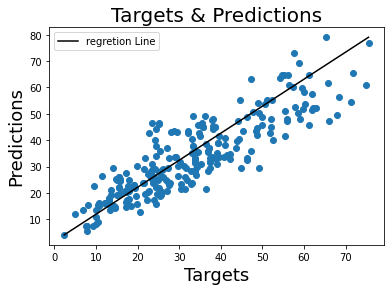

In [54]:
# Plot Targets Data & Predictions Data
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(),y_test.max()],[y_pred_lasso.min(),y_pred_lasso.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

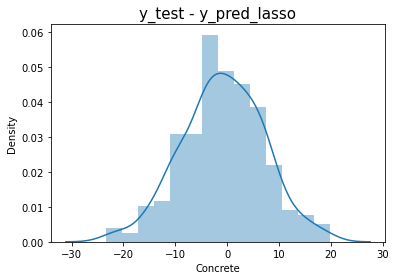

In [55]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_lasso)
plt.title('y_test - y_pred_lasso',size=15)
plt.show()

### HyperParameter Tuning For Lasso Regression

In [56]:
param_lasso=np.linspace(1,10,100)
param_grid_lasso={'alpha':param_lasso}

grid_search_lasso=GridSearchCV(estimator=lassoR,
                               param_grid=param_grid_lasso,
                               cv=5,
                               scoring='neg_mean_absolute_error')
grid_search_lasso_fit = grid_search_lasso.fit(x_train,y_train)
grid_search_lasso_fit

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
         

In [57]:
print('best_score_ :',grid_search_lasso_fit.best_score_)
print('best_params_ :',grid_search_lasso_fit.best_params_)
print('best_estimator_ :',grid_search_lasso_fit.best_estimator_)

best_score_ : -5.945155365983176
best_params_ : {'alpha': 2.6363636363636367}
best_estimator_ : Lasso(alpha=2.6363636363636367)


In [58]:
score_df_lasso = pd.DataFrame(grid_search_lasso_fit.cv_results_)
score_df_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003603      0.000800         0.001201        0.000401         1.0   
1       0.002202      0.000400         0.001802        0.000400    1.090909   
2       0.002603      0.000491         0.001401        0.000491    1.181818   
3       0.002402      0.000490         0.001401        0.000491    1.272727   
4       0.002202      0.000401         0.001601        0.000490    1.363636   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 1.0}          -5.882599          -5.984839   
1  {'alpha': 1.0909090909090908}          -5.881790          -5.984759   
2  {'alpha': 1.1818181818181819}          -5.881080          -5.984679   
3  {'alpha': 1.2727272727272727}          -5.880383          -5.984599   
4  {'alpha': 1.3636363636363638}          -5.879672          -5.984519   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -5.837493          -6.040790          -5.987590        -5.946662   
1          -5.839392          -6.041174          -5.986485        -5.946720   
2          -5.841291          -6.041567          -5.985380        -5.946800   
3          -5.841765          -6.041951          -5.984285        -5.946597   
4          -5.842164          -6.042335          -5.983180        -5.946374   

   std_test_score  rank_test_score  
0        0.074853               34  
1        0.074411               36  
2        0.073967               37  
3        0.073934               33  
4        0.073928               31

### K-Fold Method For Lasso Regression

In [59]:
kf_lasso= KFold(n_splits=5)
kfold_score_lasso = cross_val_score(lassoR,X,Y,cv=kf_lasso)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_lasso)
print('=======================================')

kfold_score_mean_lm = kfold_score_lasso.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_lasso))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_lasso))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_lasso)
print('=======================================')




The cross validation scores of k-fold method with 5 folds is [0.77855999 0.57355111 0.75747307 0.74726164 0.56968331]
The min accuracy from k-fold CV is min 0.5696833117059568
The max accuracy from k-fold CV is max 0.7785599890289139
The mean cross validation scores of k-fold method with 5 folds is [0.77855999 0.57355111 0.75747307 0.74726164 0.56968331]


In [60]:
#complete implementation of k-fold cross validation
kf_2_lasso=KFold(n_splits=5)
acc_score_kfold_lasso = []

for train_index2,test_index2 in kf_2_lasso.split(X,Y):
    
    X_train2,X_test2 = X.iloc[train_index2,:], X.iloc[test_index2,:]
    Y_train2,Y_test2 = Y.iloc[train_index2], Y.iloc[test_index2]
# create and fit     
lasso_model_fit_kf = lassoR.fit(X_train2,Y_train2)  
pred_values_lasso2 = lasso_model_fit_kf.predict(X_test2)
#r2_score
acc_2 = r2_score(pred_values_lasso2,Y_test2)
acc_score_kfold_lasso.append(acc_2)
     
avg_acc_score_2 = sum(acc_score_kfold_lasso)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_lasso))
print('Avg accuracy : {}'.format(avg_acc_score_2))

accuracy of each fold : [-0.06795931356762952]
Avg accuracy : -0.013591862713525905


## Ridge Regression

In [61]:
#Ridge Regression model
ridgeR = Ridge(alpha=1)
#Ridge Regression model Fitting
ridgeR_fit = ridgeR.fit(x_train, y_train)
ridgeR_fit

Ridge(alpha=1)

In [62]:
print('intercept : ' , ridgeR_fit.intercept_)
print('coefficient : ' , ridgeR_fit.coef_)

intercept :  17.732454739149667
coefficient :  [ 0.11587888  0.09428428  0.07599821 -0.26242528  0.05957152  0.00420357
  0.00794515  0.3425432 ]


In [63]:
# Predict The x_test Data
y_pred_ridgeR = ridgeR_fit.predict(x_test)

In [64]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_ridgeR :',(y_pred_ridgeR)[i],'|***|','y_test - y_pred_ridgeR :',list(y_test)[i]-y_pred_ridgeR[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_ridgeR : 14.396046805356082 |***| y_test - y_pred_ridgeR : 2.8794638506439156
y_test : 9.307926 |***| y_pred_ridgeR : 7.158832797630279 |***| y_test - y_pred_ridgeR : 2.1490932023697216
y_test : 31.11605188 |***| y_pred_ridgeR : 30.28086190957434 |***| y_test - y_pred_ridgeR : 0.8351899704256596
y_test : 13.18278112 |***| y_pred_ridgeR : 18.0644042617157 |***| y_test - y_pred_ridgeR : -4.881623141715702
y_test : 27.53077668 |***| y_pred_ridgeR : 22.770917002568936 |***| y_test - y_pred_ridgeR : 4.759859677431063
y_test : 34.77027468 |***| y_pred_ridgeR : 42.78218264011977 |***| y_test - y_pred_ridgeR : -8.011907960119771
y_test : 33.306517131999996 |***| y_pred_ridgeR : 37.185777706916895 |***| y_test - y_pred_ridgeR : -3.8792605749168985
y_test : 14.2032056 |***| y_pred_ridgeR : 14.966286319571342 |***| y_test - y_pred_ridgeR : -0.7630807195713416
y_test : 33.71882378 |***| y_pred_ridgeR : 33.23781016042261 |***| y_test - y_pred_ridgeR : 0.4810

y_test : 45.304778483999996 |***| y_pred_ridgeR : 43.47564509973013 |***| y_test - y_pred_ridgeR : 1.8291333842698663
y_test : 36.804918356 |***| y_pred_ridgeR : 35.533354345560376 |***| y_test - y_pred_ridgeR : 1.2715640104396257
y_test : 41.540929 |***| y_pred_ridgeR : 33.99570815216491 |***| y_test - y_pred_ridgeR : 7.54522084783509
y_test : 25.72434956 |***| y_pred_ridgeR : 25.933006965555805 |***| y_test - y_pred_ridgeR : -0.2086574055558046
y_test : 27.04124872 |***| y_pred_ridgeR : 20.38743563867723 |***| y_test - y_pred_ridgeR : 6.65381308132277
y_test : 55.25460664 |***| y_pred_ridgeR : 64.76584924786329 |***| y_test - y_pred_ridgeR : -9.511242607863288
y_test : 39.58971192 |***| y_pred_ridgeR : 33.807363235473574 |***| y_test - y_pred_ridgeR : 5.782348684526426
y_test : 49.20100736 |***| y_pred_ridgeR : 50.73185159571141 |***| y_test - y_pred_ridgeR : -1.5308442357114131
y_test : 15.361525279999999 |***| y_pred_ridgeR : 25.61622502449525 |***| y_test - y_pred_ridgeR : -10.254

y_test : 12.180972492 |***| y_pred_ridgeR : 16.12688307131531 |***| y_test - y_pred_ridgeR : -3.945910579315308
y_test : 17.54026944 |***| y_pred_ridgeR : 17.322473643253566 |***| y_test - y_pred_ridgeR : 0.217795796746433
y_test : 14.2032056 |***| y_pred_ridgeR : 14.683663153641936 |***| y_test - y_pred_ridgeR : -0.4804575536419353
y_test : 25.68987576 |***| y_pred_ridgeR : 19.420549037181548 |***| y_test - y_pred_ridgeR : 6.269326722818452
y_test : 22.50449664 |***| y_pred_ridgeR : 27.08009196400281 |***| y_test - y_pred_ridgeR : -4.575595324002812
y_test : 38.074243671999994 |***| y_pred_ridgeR : 44.34396482754417 |***| y_test - y_pred_ridgeR : -6.269721155544175
y_test : 36.80422888 |***| y_pred_ridgeR : 35.63260722250722 |***| y_test - y_pred_ridgeR : 1.1716216574927785
y_test : 43.57833058 |***| y_pred_ridgeR : 37.01606589912455 |***| y_test - y_pred_ridgeR : 6.562264680875451
y_test : 48.718374159999996 |***| y_pred_ridgeR : 44.80332155804741 |***| y_test - y_pred_ridgeR : 3.915

In [65]:
#Overfitting (train set score is much Higher)
#Ridge Regression model metrics

mse = mean_squared_error (y_test, y_pred_ridgeR)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_ridgeR))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", ridgeR_fit.score(x_train, y_train))
print ("test set score :", ridgeR_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.7523411454565369
RMSE : 7.920780102174138
mse : 62.73875742699776
training set score : 0.7838923700454554
test set score : 0.7523411454565369


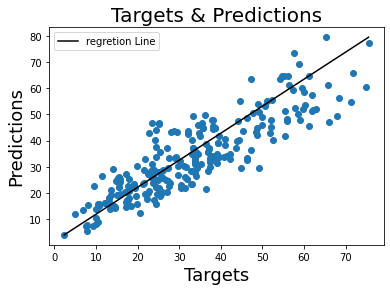

In [66]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_ridgeR)
plt.plot([y_test.min(),y_test.max()],[y_pred_ridgeR.min(),y_pred_ridgeR.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

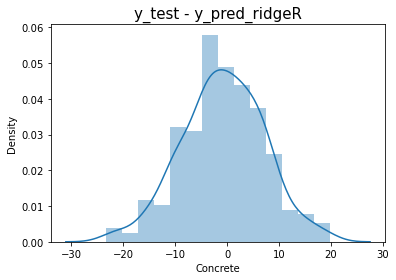

In [67]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_ridgeR)
plt.title('y_test - y_pred_ridgeR',size=15)
plt.show()

### HyperParameter Tuning For Ridge Regression

In [68]:
param_Ridge=np.linspace(1,10,100)
params_Ridge={'alpha':param_Ridge}

grid_search_Ridge=GridSearchCV(estimator=ridgeR,
                               param_grid=params_Ridge,
                               cv=5,
                               scoring='neg_mean_absolute_error')
grid_search_Ridge_fit = grid_search_Ridge.fit(x_train,y_train)
grid_search_Ridge_fit

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
         

In [69]:
print('best_score_ :',grid_search_Ridge_fit.best_score_)
print('best_params_ :',grid_search_Ridge_fit.best_params_)
print('best_estimator_ :',grid_search_Ridge_fit.best_estimator_)

best_score_ : -5.947812426625097
best_params_ : {'alpha': 10.0}
best_estimator_ : Ridge(alpha=10.0)


In [70]:
score_df_Ridge = pd.DataFrame(grid_search_Ridge_fit.cv_results_)
score_df_Ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002602  4.896117e-04         0.001202        0.000400         1.0   
1       0.002003  1.969516e-06         0.001401        0.000491    1.090909   
2       0.002001  9.368364e-07         0.001201        0.000401    1.181818   
3       0.002002  5.001110e-07         0.001401        0.000491    1.272727   
4       0.002001  6.143617e-07         0.001201        0.000400    1.363636   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 1.0}          -5.888827          -5.992659   
1  {'alpha': 1.0909090909090908}          -5.888826          -5.992658   
2  {'alpha': 1.1818181818181819}          -5.888825          -5.992658   
3  {'alpha': 1.2727272727272727}          -5.888824          -5.992658   
4  {'alpha': 1.3636363636363638}          -5.888823          -5.992658   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -5.821524          -6.039874          -5.996237        -5.947824   
1          -5.821524          -6.039875          -5.996237        -5.947824   
2          -5.821525          -6.039875          -5.996237        -5.947824   
3          -5.821525          -6.039875          -5.996237        -5.947824   
4          -5.821525          -6.039875          -5.996237        -5.947824   

   std_test_score  rank_test_score  
0        0.080324              100  
1        0.080324               99  
2        0.080324               98  
3        0.080324               97  
4        0.080324               96

### K-Fold Method For Ridge Regression

In [71]:
kf_ridge= KFold(n_splits=5)
kfold_score_ridge = cross_val_score(ridgeR,X,Y,cv=kf_ridge)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_ridge)
print('=======================================')

kfold_score_mean_ridge = kfold_score_ridge.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_ridge))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_ridge))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_ridge)
print('=======================================')




The cross validation scores of k-fold method with 5 folds is [0.76636182 0.57123824 0.75162847 0.74780705 0.56774829]
The min accuracy from k-fold CV is min 0.5677482852753961
The max accuracy from k-fold CV is max 0.7663618176863403
The mean cross validation scores of k-fold method with 5 folds is 0.6809567710974702


In [72]:
#complete implementation of k-fold cross validation
kf_2_ridge=KFold(n_splits=5)
acc_score_kfold_ridge = []

for train_index3,test_index3 in kf_2_ridge.split(X,Y):
    #print("Train:",train_ind,'Test:',test_ind)
    X_train3,X_test3 = X.iloc[train_index3,:], X.iloc[test_index3,:]
    Y_train3,Y_test3 = Y.iloc[train_index3], Y.iloc[test_index3]
# create and fit     
ridge_model_fit_kf = ridgeR.fit(X_train3,Y_train3)  
pred_values_ridge3 = ridge_model_fit_kf.predict(X_test3)
#r2_score
acc_3 = r2_score(pred_values_ridge3,Y_test3)
acc_score_kfold_ridge.append(acc_3)
     
avg_acc_score_3 = sum(acc_score_kfold_ridge)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_ridge))
print('Avg accuracy : {}'.format(avg_acc_score_3))

accuracy of each fold : [-0.07219196679148232]
Avg accuracy : -0.014438393358296464


### Decision Tree Regressor


In [73]:
#Decision Tree Regression model
TreeReg = DecisionTreeRegressor()
#Decision Tree Regression model Fitting
TreeReg_fit = TreeReg.fit(x_train,y_train)
TreeReg_fit

DecisionTreeRegressor()

In [74]:
# Predict The x_test Data
y_pred_TreeReg = TreeReg_fit.predict(x_test)

In [75]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_TreeReg :',(y_pred_TreeReg)[i],'|***|','y_test - y_pred_TreeReg :',list(y_test)[i]-y_pred_TreeReg[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_TreeReg : 22.347985588 |***| y_test - y_pred_TreeReg : -5.072474932000002
y_test : 9.307926 |***| y_pred_TreeReg : 10.38350856 |***| y_test - y_pred_TreeReg : -1.075582559999999
y_test : 31.11605188 |***| y_pred_TreeReg : 38.500339839999995 |***| y_test - y_pred_TreeReg : -7.384287959999995
y_test : 13.18278112 |***| y_pred_TreeReg : 9.131420144 |***| y_test - y_pred_TreeReg : 4.051360976
y_test : 27.53077668 |***| y_pred_TreeReg : 32.039949719999996 |***| y_test - y_pred_TreeReg : -4.509173039999997
y_test : 34.77027468 |***| y_pred_TreeReg : 25.510612 |***| y_test - y_pred_TreeReg : 9.259662680000002
y_test : 33.306517131999996 |***| y_pred_TreeReg : 29.870858223999996 |***| y_test - y_pred_TreeReg : 3.4356589080000006
y_test : 14.2032056 |***| y_pred_TreeReg : 12.73462172 |***| y_test - y_pred_TreeReg : 1.4685838800000006
y_test : 33.71882378 |***| y_pred_TreeReg : 33.7153764 |***| y_test - y_pred_TreeReg : 0.0034473800000043298
y_test : 61.8

y_test : 30.219733079999997 |***| y_pred_TreeReg : 33.94290348 |***| y_test - y_pred_TreeReg : -3.7231704000000008
y_test : 37.404073 |***| y_pred_TreeReg : 40.14818748 |***| y_test - y_pred_TreeReg : -2.7441144800000004
y_test : 26.147687824 |***| y_pred_TreeReg : 26.14492992 |***| y_test - y_pred_TreeReg : 0.0027579039999992006
y_test : 39.056057496 |***| y_pred_TreeReg : 39.05192064 |***| y_test - y_pred_TreeReg : 0.0041368560000023535
y_test : 37.437857324 |***| y_pred_TreeReg : 37.42475728 |***| y_test - y_pred_TreeReg : 0.013100043999997979
y_test : 32.01138571527068 |***| y_pred_TreeReg : 33.398217439999996 |***| y_test - y_pred_TreeReg : -1.3868317247293191
y_test : 47.22221124 |***| y_pred_TreeReg : 44.0919902 |***| y_test - y_pred_TreeReg : 3.130221040000002
y_test : 22.752708 |***| y_pred_TreeReg : 25.510612 |***| y_test - y_pred_TreeReg : -2.757904
y_test : 37.431652039999996 |***| y_pred_TreeReg : 37.363393916 |***| y_test - y_pred_TreeReg : 0.0682581239999962
y_test : 23.

In [76]:
#Overfitting (train set score is much Higher)
#Decision Tree Regression model metrics

mse = mean_squared_error (y_test, y_pred_TreeReg)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_TreeReg))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", TreeReg_fit.score(x_train, y_train))
print ("test set score :", TreeReg_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.8255622464541722
RMSE : 6.647544742218571
mse : 44.189851099797764
training set score : 0.9953862808019948
test set score : 0.8255622464541722


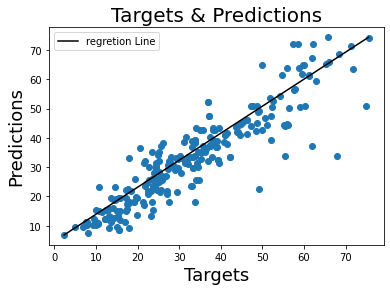

In [77]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_TreeReg)
plt.plot([y_test.min(),y_test.max()],[y_pred_TreeReg.min(),y_pred_TreeReg.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

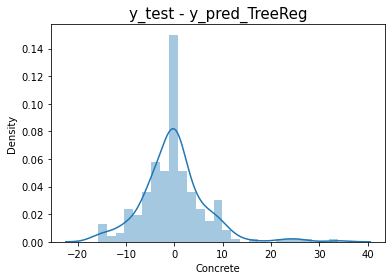

In [78]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_TreeReg)
plt.title('y_test - y_pred_TreeReg',size=15)
plt.show()

In [79]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
print("Feature names are:", feature_name)
#print("Survived categories:",class_name)

Feature names are: ['Cement', 'Blast', 'fly', 'water', 'Superplasticizer', 'coarse', 'Fine_Aggregate', 'age']


In [80]:
# Create a dot file while stores the tree structure

dot_data = StringIO()
export_graphviz(TreeReg_fit, out_file=dot_data,filled=True, rounded=True,special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("TitanicDTree.png")
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.880005 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.880005 to fit



### HyperParameter Tuning For Decision Tree Regressor

In [81]:
# create the parameter for grid
params_tree = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100]
    
}
grid_search_tree = GridSearchCV(estimator=TreeReg_fit,
                         param_grid=params_tree,
                         cv=4, n_jobs=-1, verbose=1)
grid_search_tree_fit = grid_search_tree.fit(x_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


In [82]:
print('best_score_ :',grid_search_tree_fit.best_score_)
print('best_params_ :',grid_search_tree_fit.best_params_)
print('best_estimator_ :',grid_search_tree_fit.best_estimator_)


best_score_ : 0.7658877095523398
best_params_ : {'max_depth': 20, 'min_samples_leaf': 5}
best_estimator_ : DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)


In [83]:
score_df_tree = pd.DataFrame(grid_search_tree_fit.cv_results_)
score_df_tree.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005254      0.000432         0.003251        0.000433   
1       0.008008      0.003677         0.003254        0.000831   
2       0.005504      0.002601         0.004755        0.002683   
3       0.009759      0.001923         0.005755        0.002488   
4       0.005004      0.000707         0.003253        0.000433   

  param_max_depth param_min_samples_leaf  \
0               2                      5   
1               2                     10   
2               2                     20   
3               2                     50   
4               2                    100   

                                      params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 5}           0.365789   
1   {'max_depth': 2, 'min_samples_leaf': 10}           0.365789   
2   {'max_depth': 2, 'min_samples_leaf': 20}           0.365789   
3   {'max_depth': 2, 'min_samples_leaf': 50}           0.313155   
4  {'max_depth': 2, 'min_samples_leaf': 100}           0.218533   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.471552           0.479302           0.397516         0.428540   
1           0.471552           0.479302           0.397516         0.428540   
2           0.471552           0.479302           0.397516         0.428540   
3           0.468315           0.444712           0.315495         0.385419   
4           0.376689           0.353035           0.264090         0.303087   

   std_test_score  rank_test_score  
0        0.048288               19  
1        0.048288               17  
2        0.048288               17  
3        0.071587               20  
4        0.064386               25

### K-Fold Method For Decision Tree Regressor


In [84]:
kf_Tree= KFold(n_splits=5)
kfold_score_Tree = cross_val_score(TreeReg,X,Y,cv=kf_Tree)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_Tree)
print('=======================================')

kfold_score_mean_Tree = kfold_score_Tree.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_Tree))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_Tree))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_Tree)
print('=======================================')


The cross validation scores of k-fold method with 5 folds is [0.72397477 0.31310176 0.65138084 0.75572384 0.18834121]
The min accuracy from k-fold CV is min 0.18834121487738853
The max accuracy from k-fold CV is max 0.7557238368896706
The mean cross validation scores of k-fold method with 5 folds is 0.5265044828497605


In [85]:
#complete implementation of k-fold cross validation
kf_2_Tree=KFold(n_splits=5)
acc_score_kfold_Tree = []

for train_index4,test_index4 in kf_2_Tree.split(X,Y):
    
    X_train4,X_test4 = X.iloc[train_index4,:], X.iloc[test_index4,:]
    Y_train4,Y_test4 = Y.iloc[train_index4], Y.iloc[test_index4]
# create and fit     
Tree_model_fit_kf = TreeReg.fit(X_train4,Y_train4)  
pred_values_Tree4 = Tree_model_fit_kf.predict(X_test4)
#r2_score
acc_4 = r2_score(pred_values_Tree4,Y_test4)
acc_score_kfold_Tree.append(acc_4)
     
avg_acc_score_4 = sum(acc_score_kfold_Tree)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_Tree))
print('Avg accuracy : {}'.format(avg_acc_score_4))

accuracy of each fold : [0.3253820064482944]
Avg accuracy : 0.06507640128965889


### Random Forest Regressor


In [86]:
#Random Forest Regressor mODEL
random_reg = RandomForestRegressor(n_estimators=100,random_state=0)
#Random Forest Regressor Model Fitting
random_reg_fit = random_reg.fit(x_train,y_train)
random_reg_fit

RandomForestRegressor(random_state=0)

In [87]:
# Predict The x_test Data
y_pred_random = random_reg.predict(x_test)


In [88]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_random :',(y_pred_random)[i],'|***|','y_test - y_pred_random :',list(y_test)[i]-y_pred_random[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_random : 24.463849536800012 |***| y_test - y_pred_random : -7.188338880800014
y_test : 9.307926 |***| y_pred_random : 8.980096906476232 |***| y_test - y_pred_random : 0.32782909352376777
y_test : 31.11605188 |***| y_pred_random : 35.551885357879975 |***| y_test - y_pred_random : -4.435833477879974
y_test : 13.18278112 |***| y_pred_random : 12.739103314068942 |***| y_test - y_pred_random : 0.443677805931058
y_test : 27.53077668 |***| y_pred_random : 30.15446728183999 |***| y_test - y_pred_random : -2.623690601839993
y_test : 34.77027468 |***| y_pred_random : 28.8574368503041 |***| y_test - y_pred_random : 5.912837829695899
y_test : 33.306517131999996 |***| y_pred_random : 29.89123223980001 |***| y_test - y_pred_random : 3.4152848921999848
y_test : 14.2032056 |***| y_pred_random : 14.868737083505414 |***| y_test - y_pred_random : -0.6655314835054131
y_test : 33.71882378 |***| y_pred_random : 34.19289368807999 |***| y_test - y_pred_random : -0.4740

In [89]:
#Overfitting (train set score is much Higher)
#Random Forest Regression model metrics
mse = mean_squared_error (y_test, y_pred_random)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_random))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", random_reg_fit.score(x_train, y_train))
print ("test set score :", random_reg_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.9103721892948206
RMSE : 4.764994686394147
mse : 22.705174361364453
training set score : 0.9821796748112257
test set score : 0.9103721892948206


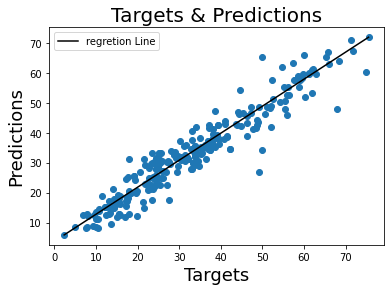

In [90]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_random)
plt.plot([y_test.min(),y_test.max()],[y_pred_random.min(),y_pred_random.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

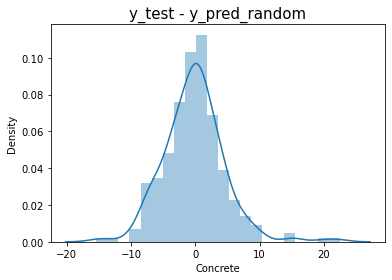

In [91]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_random)
plt.title('y_test - y_pred_random',size=15)
plt.show()

### HyperParameter Tuning For Random Forest Regressor

In [92]:
pram_grid_random = {'n_estimators' : [20,50,100],
                        'max_features':[1,2,3]}

In [93]:
grid_results_random = GridSearchCV(random_reg_fit, pram_grid_random, cv = 5)
grid_results_random_fit = grid_results_random.fit(x_train, y_train)
grid_results_random_fit

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [1, 2, 3],
                         'n_estimators': [20, 50, 100]})

In [94]:
print('best_score_ :',grid_results_random_fit.best_score_)
print('best_params_ :',grid_results_random_fit.best_params_)
print('best_estimator_ :',grid_results_random_fit.best_estimator_)

best_score_ : 0.8825193614955008
best_params_ : {'max_features': 3, 'n_estimators': 100}
best_estimator_ : RandomForestRegressor(max_features=3, random_state=0)


In [95]:
cv_results_random = pd.DataFrame(grid_results_random_fit.cv_results_)
cv_results_random.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.026902      0.000840         0.003603        0.000491   
1       0.062187      0.000421         0.005831        0.000347   
2       0.122441      0.000467         0.009962        0.000070   
3       0.028803      0.000417         0.003395        0.000484   
4       0.067198      0.000394         0.005604        0.000485   

  param_max_features param_n_estimators  \
0                  1                 20   
1                  1                 50   
2                  1                100   
3                  2                 20   
4                  2                 50   

                                     params  split0_test_score  \
0   {'max_features': 1, 'n_estimators': 20}           0.806368   
1   {'max_features': 1, 'n_estimators': 50}           0.829735   
2  {'max_features': 1, 'n_estimators': 100}           0.828100   
3   {'max_features': 2, 'n_estimators': 20}           0.862283   
4   {'max_features': 2, 'n_estimators': 50}           0.880118   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.734621           0.841164           0.799140           0.783260   
1           0.748126           0.851222           0.793580           0.810795   
2           0.753691           0.860554           0.800289           0.818414   
3           0.811464           0.888229           0.855021           0.878178   
4           0.808351           0.906171           0.844512           0.870679   

   mean_test_score  std_test_score  rank_test_score  
0         0.792911        0.034754                9  
1         0.806692        0.035022                8  
2         0.812210        0.035199                7  
3         0.859035        0.026489                6  
4         0.861966        0.033283                5

### K-Fold Method For Random Forest Regressor

In [96]:
kf_random= KFold(n_splits=5)
kfold_score_random = cross_val_score(random_reg,X,Y,cv=kf_random)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_random)
print('=======================================')

kfold_score_mean_random = kfold_score_random.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_random))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_random))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_random)
print('=======================================')




The cross validation scores of k-fold method with 5 folds is [0.78180061 0.58012703 0.80891737 0.83059883 0.48027298]
The min accuracy from k-fold CV is min 0.48027298007837826
The max accuracy from k-fold CV is max 0.8305988267224856
The mean cross validation scores of k-fold method with 5 folds is 0.6963433623810011


In [97]:
#complete implementation of k-fold cross validation
kf_2_random=KFold(n_splits=5)
acc_score_kfold_random = []

for train_index5,test_index5 in kf_2_random.split(X,Y):
    
    X_train5,X_test5 = X.iloc[train_index5,:], X.iloc[test_index5,:]
    Y_train5,Y_test5 = Y.iloc[train_index5], Y.iloc[test_index5]
# create and fit     
random_model_fit_kf = random_reg.fit(X_train5,Y_train5)  
pred_values_random1 = random_model_fit_kf.predict(X_test5)
#r2_score
acc_5 = r2_score(pred_values_random1,Y_test5)
acc_score_kfold_random.append(acc_5)
     
avg_acc_score_5 = sum(acc_score_kfold_random)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_random))
print('Avg accuracy : {}'.format(avg_acc_score_5))

accuracy of each fold : [-0.0636136719148992]
Avg accuracy : -0.012722734382979838


### KNN Regressor


In [98]:
#KNN Regression model
KNN_model = KNeighborsRegressor()
#KNN Regression model Fitting
KNN_model_fit = KNN_model.fit(x_train,y_train)
KNN_model_fit

KNeighborsRegressor()

In [99]:
# Predict The x_test Data
y_pred_KNN = KNN_model_fit.predict(x_test)

In [100]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_KNN :',(y_pred_KNN)[i],'|***|','y_test - y_pred_KNN :',list(y_test)[i]-y_pred_KNN[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_KNN : 11.906423148799998 |***| y_test - y_pred_KNN : 5.3690875072
y_test : 9.307926 |***| y_pred_KNN : 12.359546776 |***| y_test - y_pred_KNN : -3.051620776
y_test : 31.11605188 |***| y_pred_KNN : 25.725728511999996 |***| y_test - y_pred_KNN : 5.390323368000004
y_test : 13.18278112 |***| y_pred_KNN : 34.25937296400001 |***| y_test - y_pred_KNN : -21.076591844000006
y_test : 27.53077668 |***| y_pred_KNN : 22.514149304 |***| y_test - y_pred_KNN : 5.016627375999999
y_test : 34.77027468 |***| y_pred_KNN : 39.31943732800001 |***| y_test - y_pred_KNN : -4.5491626480000065
y_test : 33.306517131999996 |***| y_pred_KNN : 31.667081099199997 |***| y_test - y_pred_KNN : 1.639436032799999
y_test : 14.2032056 |***| y_pred_KNN : 17.5024861552 |***| y_test - y_pred_KNN : -3.2992805551999993
y_test : 33.71882378 |***| y_pred_KNN : 36.9480535736 |***| y_test - y_pred_KNN : -3.2292297935999983
y_test : 61.887365759999994 |***| y_pred_KNN : 62.7078422 |***| y_test 

y_test : 15.04436632 |***| y_pred_KNN : 17.059015191999997 |***| y_test - y_pred_KNN : -2.014648871999997
y_test : 35.3011712 |***| y_pred_KNN : 36.939366176 |***| y_test - y_pred_KNN : -1.6381949760000012
y_test : 51.95891136 |***| y_pred_KNN : 42.969523271999996 |***| y_test - y_pred_KNN : 8.989388088000005
y_test : 19.691434559999998 |***| y_pred_KNN : 16.435315202399998 |***| y_test - y_pred_KNN : 3.2561193575999994
y_test : 37.79707432 |***| y_pred_KNN : 57.63881464800001 |***| y_test - y_pred_KNN : -19.841740328000007
y_test : 28.79941252 |***| y_pred_KNN : 48.7127204568 |***| y_test - y_pred_KNN : -19.9133079368
y_test : 68.29949256 |***| y_pred_KNN : 65.97733739200001 |***| y_test - y_pred_KNN : 2.3221551679999948
y_test : 38.76923548 |***| y_pred_KNN : 37.47577850399999 |***| y_test - y_pred_KNN : 1.2934569760000088
y_test : 20.593958644 |***| y_pred_KNN : 13.341360600000002 |***| y_test - y_pred_KNN : 7.252598043999999
y_test : 19.009542795999998 |***| y_pred_KNN : 27.6736361

In [101]:
#Overfitting (train set score is much Higher)
#KNN Regression model metrics

mse = mean_squared_error (y_test, y_pred_KNN)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_KNN))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", KNN_model_fit.score(x_train, y_train))
print ("test set score :", KNN_model_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.6467074960620073
RMSE : 9.460372521000751
mse : 89.4986482361061
training set score : 0.777446099630196
test set score : 0.6467074960620073


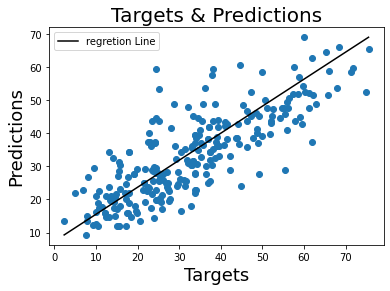

In [102]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_KNN)
plt.plot([y_test.min(),y_test.max()],[y_pred_KNN.min(),y_pred_KNN.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

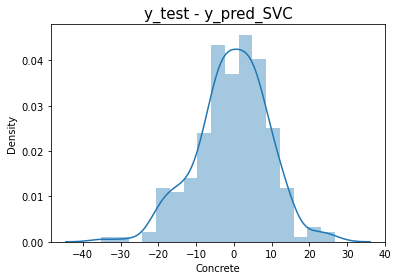

In [103]:
#plot Concrete Density Variable 

sns.distplot(y_test-y_pred_KNN)
plt.title('y_test - y_pred_SVC',size=15)
plt.show()

### HyperParameter Tuning For KNN Regressor

In [104]:
grid_param_knn ={'n_neighbors':[3,20,2],
                 'metric':['canberra','euclidean','minkowski']}


In [105]:
grid_search_KNN = GridSearchCV(estimator = KNN_model_fit,param_grid = grid_param_knn,cv = 5)  

In [106]:
grid_search_KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [3, 20, 2]})

In [107]:
print('best_score_ :',grid_search_KNN.best_score_)
print('best_params_ :',grid_search_KNN.best_params_)
print('best_estimator_ :',grid_search_KNN.best_estimator_)

best_score_ : 0.829034887901669
best_params_ : {'metric': 'canberra', 'n_neighbors': 3}
best_estimator_ : KNeighborsRegressor(metric='canberra', n_neighbors=3)


In [108]:
cv_results_KNN = pd.DataFrame(grid_search_KNN.cv_results_)
cv_results_KNN.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0       0.002202  4.002579e-04         0.003334    4.200113e-04     canberra   
1       0.002002  8.844012e-07         0.003003    3.814697e-07     canberra   
2       0.002402  4.898041e-04         0.003003    4.370285e-07     canberra   
3       0.002602  4.900962e-04         0.002002    5.722046e-07    euclidean   
4       0.002402  4.902323e-04         0.002402    4.902908e-04    euclidean   

  param_n_neighbors                                      params  \
0                 3    {'metric': 'canberra', 'n_neighbors': 3}   
1                20   {'metric': 'canberra', 'n_neighbors': 20}   
2                 2    {'metric': 'canberra', 'n_neighbors': 2}   
3                 3   {'metric': 'euclidean', 'n_neighbors': 3}   
4                20  {'metric': 'euclidean', 'n_neighbors': 20}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.791767           0.806835           0.873269           0.809762   
1           0.717376           0.657591           0.766552           0.674373   
2           0.795530           0.805381           0.858108           0.810959   
3           0.504160           0.578075           0.694371           0.692994   
4           0.526998           0.458792           0.568943           0.441013   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.863541         0.829035        0.032865                1  
1           0.741302         0.711439        0.040590                3  
2           0.839248         0.821845        0.023237                2  
3           0.671959         0.628312        0.075353                4  
4           0.567570         0.512663        0.053709                8

### K-Fold Method For KNN Regressor

In [109]:
kf_KNN= KFold(n_splits=5)
kfold_score_KNN = cross_val_score(KNN_model,X,Y,cv=kf_KNN)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_KNN)
print('=======================================')

kfold_score_mean_KNN = kfold_score_KNN.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_KNN))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_KNN))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_KNN)
print('=======================================')




The cross validation scores of k-fold method with 5 folds is [0.52594106 0.07540603 0.60044536 0.50397779 0.33294487]
The min accuracy from k-fold CV is min 0.07540602956058295
The max accuracy from k-fold CV is max 0.6004453640951728
The mean cross validation scores of k-fold method with 5 folds is 0.40774302235023746


In [110]:
#complete implementation of k-fold cross validation
kf_2_KNN=KFold(n_splits=5)
acc_score_kfold_KNN = []

for train_index6,test_index6 in kf_2_KNN.split(X,Y):
    #print("Train:",train_ind,'Test:',test_ind)
    X_train6,X_test6 = X.iloc[train_index6,:], X.iloc[test_index6,:]
    Y_train6,Y_test6 = Y.iloc[train_index6], Y.iloc[test_index6]
# create and fit     
KNN_model_fit_kf = KNN_model.fit(X_train6,Y_train6)  
pred_values_KNN6 = KNN_model_fit_kf.predict(X_test6)
#r2_score
acc_6 = r2_score(pred_values_KNN6,Y_test6)
acc_score_kfold_KNN.append(acc_6)
     
avg_acc_score_6 = sum(acc_score_kfold_KNN)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_KNN))
print('Avg accuracy : {}'.format(avg_acc_score_6))

accuracy of each fold : [0.2522282058039249]
Avg accuracy : 0.05044564116078498


### SVM Regresso

In [111]:
#SVM Regression model
SVC_model = SVR(C = 1)
#SVM Regression model Fitting
SVC_model_fit = SVC_model.fit(x_train,y_train)


In [112]:
# Predict The x_test Data
y_pred_SVC = SVC_model_fit.predict(x_test)

In [113]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_SVC :',(y_pred_SVC)[i],'|***|','y_test - y_pred_SVC :',list(y_test)[i]-y_pred_SVC[i])
    #print('--------------------------------------------------------------------------------------------------------------')

y_test : 17.275510655999998 |***| y_pred_SVC : 27.982512094725223 |***| y_test - y_pred_SVC : -10.707001438725225
y_test : 9.307926 |***| y_pred_SVC : 29.764281474283724 |***| y_test - y_pred_SVC : -20.456355474283725
y_test : 31.11605188 |***| y_pred_SVC : 27.85814238401217 |***| y_test - y_pred_SVC : 3.257909495987832
y_test : 13.18278112 |***| y_pred_SVC : 29.239884713606266 |***| y_test - y_pred_SVC : -16.057103593606264
y_test : 27.53077668 |***| y_pred_SVC : 32.035836849414245 |***| y_test - y_pred_SVC : -4.5050601694142465
y_test : 34.77027468 |***| y_pred_SVC : 35.106000394539876 |***| y_test - y_pred_SVC : -0.3357257145398762
y_test : 33.306517131999996 |***| y_pred_SVC : 31.28704472453413 |***| y_test - y_pred_SVC : 2.019472407465866
y_test : 14.2032056 |***| y_pred_SVC : 29.55038499306186 |***| y_test - y_pred_SVC : -15.347179393061861
y_test : 33.71882378 |***| y_pred_SVC : 33.50048168405439 |***| y_test - y_pred_SVC : 0.2183420959456086
y_test : 61.887365759999994 |***| y_

y_test : 41.40992856 |***| y_pred_SVC : 29.190855898306847 |***| y_test - y_pred_SVC : 12.21907266169315
y_test : 35.101223159999996 |***| y_pred_SVC : 35.70620871720015 |***| y_test - y_pred_SVC : -0.6049855572001519
y_test : 24.290928956 |***| y_pred_SVC : 28.765914942108925 |***| y_test - y_pred_SVC : -4.474985986108926
y_test : 23.744174488 |***| y_pred_SVC : 29.035186219059785 |***| y_test - y_pred_SVC : -5.291011731059786
y_test : 71.29871315999999 |***| y_pred_SVC : 36.779822974940714 |***| y_test - y_pred_SVC : 34.51889018505928
y_test : 27.827251359999998 |***| y_pred_SVC : 31.51001286592055 |***| y_test - y_pred_SVC : -3.6827615059205527
y_test : 12.17614616 |***| y_pred_SVC : 27.494162341492256 |***| y_test - y_pred_SVC : -15.318016181492256
y_test : 10.76272036 |***| y_pred_SVC : 27.37203882256547 |***| y_test - y_pred_SVC : -16.609318462565472
y_test : 33.72916592 |***| y_pred_SVC : 29.47112563299467 |***| y_test - y_pred_SVC : 4.258040287005329
y_test : 51.72448952 |***| 

In [114]:
#Underfitting (train set score is Lower)
#SVM Regression model metrics
mse = mean_squared_error (y_test, y_pred_SVC)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_SVC))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", SVC_model_fit.score(x_train, y_train))
print ("test set score :", SVC_model_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.25551978078161786
RMSE : 13.733069188740815
mse : 188.5971893427423
training set score : 0.20989217856692333
test set score : 0.25551978078161786


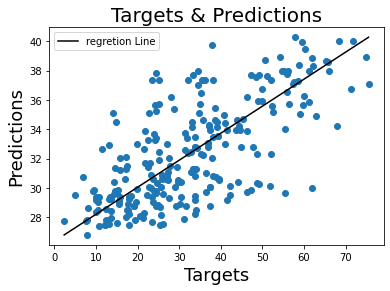

In [115]:
# Plot Targets Data & Predictions Data

plt.scatter(y_test, y_pred_SVC)
plt.plot([y_test.min(),y_test.max()],[y_pred_SVC.min(),y_pred_SVC.max()], color = 'black' , label = 'regretion Line')
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Concrete', ylabel='Density'>

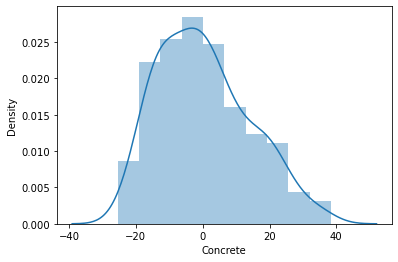

In [116]:
#plot Concrete Density Variable 
import seaborn as sns
sns.distplot(y_test-y_pred_SVC)

### HyperParameter Tuning For SVM Regressor

In [117]:
hyper_params_SVM = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
grid_search_SVM = GridSearchCV(estimator = SVC_model, 
                        param_grid = hyper_params_SVM,
                        cv = 5)  
grid_search_SVM_fit = grid_search_SVM.fit(x_train, y_train)    

print('best_score_ :',grid_search_SVM_fit.best_score_)
print('best_params_ :',grid_search_SVM_fit.best_params_)
print('best_estimator_ :',grid_search_SVM_fit.best_estimator_)

best_score_ : 0.8038141779168377
best_params_ : {'C': 100, 'gamma': 0.0001}
best_estimator_ : SVR(C=100, gamma=0.0001)


In [118]:
cv_results_SVM = pd.DataFrame(grid_search_SVM_fit.cv_results_)
cv_results_SVM.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.018185      0.000421         0.008007        0.000001       1   
1       0.014192      0.000371         0.006998        0.000006       1   
2       0.013799      0.000396         0.007006        0.000009       1   
3       0.020004      0.000635         0.008000        0.000004      10   
4       0.017399      0.000490         0.006803        0.000408      10   

  param_gamma                     params  split0_test_score  \
0        0.01    {'C': 1, 'gamma': 0.01}           0.040757   
1       0.001   {'C': 1, 'gamma': 0.001}           0.124186   
2      0.0001  {'C': 1, 'gamma': 0.0001}           0.405326   
3        0.01   {'C': 10, 'gamma': 0.01}           0.315050   
4       0.001  {'C': 10, 'gamma': 0.001}           0.552460   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.010058           0.033113           0.029148           0.007139   
1           0.088300           0.098995           0.096481           0.069106   
2           0.312776           0.369465           0.327387           0.348687   
3           0.213626           0.248392           0.194365           0.188316   
4           0.450367           0.502093           0.447564           0.426198   

   mean_test_score  std_test_score  rank_test_score  
0         0.024043        0.013183               12  
1         0.095414        0.017802               11  
2         0.352728        0.032562                7  
3         0.231950        0.046537               10  
4         0.475736        0.045766                6

### K-Fold Method For SVM Regressor

In [119]:
kf_SVM= KFold(n_splits=5)
kfold_score_SVM = cross_val_score(SVC_model,X,Y,cv=kf_SVM)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score_SVM)
print('=======================================')

kfold_score_mean_SVM = kfold_score_SVM.mean()
print("The min accuracy from k-fold CV is min",min(kfold_score_SVM))
print('=======================================')
print("The max accuracy from k-fold CV is max", max(kfold_score_SVM))
print('=======================================')
print("The mean cross validation scores of k-fold method with 5 folds is",kfold_score_mean_SVM)
print('=======================================')

The cross validation scores of k-fold method with 5 folds is [ 0.05611225 -0.13485606  0.13805154  0.15177542  0.28080918]
The min accuracy from k-fold CV is min -0.13485605613462348
The max accuracy from k-fold CV is max 0.28080918173147174
The mean cross validation scores of k-fold method with 5 folds is 0.0983784681705681


In [120]:
#complete implementation of k-fold cross validation
kf_2_SVM=KFold(n_splits=5)
acc_score_kfold_SVM = []

for train_index7,test_index7 in kf_2_SVM.split(X,Y):
    
    X_train7,X_test7 = X.iloc[train_index7,:], X.iloc[test_index7,:]
    Y_train7,Y_test7 = Y.iloc[train_index7], Y.iloc[test_index7]
# create and fit     
SVC_model_fit_kf = SVC_model.fit(X_train7,Y_train7)  
pred_values_SVM7 = SVC_model_fit_kf.predict(X_test7)
#r2_score
acc_7 = r2_score(pred_values_SVM7,Y_test7)
acc_score_kfold_SVM.append(acc_7)
     
avg_acc_score_7 = sum(acc_score_kfold_SVM)/5
 
print('accuracy of each fold : {}'.format(acc_score_kfold_SVM))
print('Avg accuracy : {}'.format(avg_acc_score_7))


accuracy of each fold : [-14.16024137184945]
Avg accuracy : -2.83204827436989


# 14. Which algorithm performs better on this dataset and Why

##### Random Forest MODEL is Perform Better Than other model because its R2 Score,RMSE,mse,training set score,test set score score are better than other models.

#### ALL Regression MODEL  R2 Score,RMSE,mse,training set score,test set score

In [121]:

print("Regression MODEL         R2 Score             RMSE                 mse              training set score     test set score")
print('==============================================================================================================================')
print("Linear Regression: [0.7523410705644032]  [7.920781299797535]  [62.73877639922233]  [0.7838923700526783]  [0.7523410705644032]")
print('===================')
print("Lasso Regression:  [0.7525141892142522]  [7.918012421886296]  [62.69492071314568]  [0.7837355559406456]  [0.7525141892142522] ")
print('===================')
print("Ridge Regression:  [0.7523411454565369]  [7.920780102174138]  [62.73875742699776]  [0.7838923700454554]  [0.7523411454565369] ")
print('===================')
print("Decision Tree :    [0.8304880667307597]  [6.553015045007421]  [42.942006180093614] [0.9953862808019948]  [0.8304880667307597] ")
print('===================')
print("Random Forest :    [0.9103721892948206]  [4.764994686394147]  [22.705174361364453] [0.9821796748112257]  [0.9103721892948206] ")
print('===================')
print("KNN Regressor:     [0.6467074960620073]  [9.460372521000751]  [89.4986482361061]   [0.777446099630196]   [0.6467074960620073] ")
print('===================')
print("SVM Regresso:      [0.25551978078161786] [13.733069188740815] [188.5971893427423]  [0.20989217856692333] [0.25551978078161786] ")


Regression MODEL         R2 Score             RMSE                 mse              training set score     test set score
Linear Regression: [0.7523410705644032]  [7.920781299797535]  [62.73877639922233]  [0.7838923700526783]  [0.7523410705644032]
Lasso Regression:  [0.7525141892142522]  [7.918012421886296]  [62.69492071314568]  [0.7837355559406456]  [0.7525141892142522] 
Ridge Regression:  [0.7523411454565369]  [7.920780102174138]  [62.73875742699776]  [0.7838923700454554]  [0.7523411454565369] 
Decision Tree :    [0.8304880667307597]  [6.553015045007421]  [42.942006180093614] [0.9953862808019948]  [0.8304880667307597] 
Random Forest :    [0.9103721892948206]  [4.764994686394147]  [22.705174361364453] [0.9821796748112257]  [0.9103721892948206] 
KNN Regressor:     [0.6467074960620073]  [9.460372521000751]  [89.4986482361061]   [0.777446099630196]   [0.6467074960620073] 
SVM Regresso:      [0.25551978078161786] [13.733069188740815] [188.5971893427423]  [0.20989217856692333] [0.255519780

#### ALL HyperParameter Regression MODEL best_score,best_params,best_estimator

In [122]:
print("HyperParameter MODEL      best_score_             best_params_                             best_estimator_")
print('=========================================================================================================================')
print("Linear Regression:     [??????????????????]  [??????????????????????????]              [???????????????????????????]  ")
print('===================')
print("Lasso Regression:      [-5.945155365983176]  ['alpha': 2.6363636363636367]             [Lasso(alpha=2.6363636363636367]   ")
print('===================')
print("Ridge Regression:      [-5.947812426625097]  ['alpha': 10.0]                           [Ridge(alpha=10.0)]   ")
print('===================') 
print("Decision Tree :        [0.763653387726947]   ['max_depth': 20, 'min_samples_leaf': 5]  [(max_depth=20, min_samples_leaf=5]  ")
print('===================')
print("Random Forest :        [0.8825193614955008]  ['max_features': 3, 'n_estimators': 100]  [(max_features=3, random_state=0)] ")
print('===================')
print("KNN Regressor:         [0.829034887901669]   ['metric': 'canberra', 'n_neighbors': 3]  [(metric='canberra', n_neighbors=3)]    ")
print('===================')
print("SVM Regresso:          [0.8038141779168377]  ['C': 100, 'gamma': 0.0001]               [SVR(C=100, gamma=0.0001)]   ") 

HyperParameter MODEL      best_score_             best_params_                             best_estimator_
Linear Regression:     [??????????????????]  [??????????????????????????]              [???????????????????????????]  
Lasso Regression:      [-5.945155365983176]  ['alpha': 2.6363636363636367]             [Lasso(alpha=2.6363636363636367]   
Ridge Regression:      [-5.947812426625097]  ['alpha': 10.0]                           [Ridge(alpha=10.0)]   
Decision Tree :        [0.763653387726947]   ['max_depth': 20, 'min_samples_leaf': 5]  [(max_depth=20, min_samples_leaf=5]  
Random Forest :        [0.8825193614955008]  ['max_features': 3, 'n_estimators': 100]  [(max_features=3, random_state=0)] 
KNN Regressor:         [0.829034887901669]   ['metric': 'canberra', 'n_neighbors': 3]  [(metric='canberra', n_neighbors=3)]    
SVM Regresso:          [0.8038141779168377]  ['C': 100, 'gamma': 0.0001]               [SVR(C=100, gamma=0.0001)]   


#### ALL K-Fold Regression MODEL accuracy of each fold,Avg accuracy

In [123]:
print("K-Fold Regression MODEL   || accuracy of each fold ||     || Avg accuracy || ")
print('===============================================================================')
print("K-Fold Linear Regresso :     {0}        {1} ".format(acc_score_kfold_lm, avg_acc_score_1))
print('===================')
print("K-Fold Lasso Regresso :      {0}      {1} ".format(acc_score_kfold_lasso, avg_acc_score_2))
print('===================')
print("K-Fold Ridge Regresso :      {0}      {1} ".format(acc_score_kfold_ridge, avg_acc_score_3))
print('===================')
print("K-Fold Decision Tree :       {0}        {1} ".format(acc_score_kfold_Tree, avg_acc_score_4))
print('===================')
print("K-Fold Random Forest :       {0}       {1} ".format(acc_score_kfold_random, avg_acc_score_5))
print('===================')
print("K-Fold KNN Regressor :       {0}         {1} ".format(acc_score_kfold_KNN, avg_acc_score_6))
print('===================')
print("K-Fold SVM Regresso :        {0}        {1} ".format(acc_score_kfold_SVM, avg_acc_score_7))

K-Fold Regression MODEL   || accuracy of each fold ||     || Avg accuracy || 
K-Fold Linear Regresso :     [-0.0721884677700304]        -0.014437693554006082 
K-Fold Lasso Regresso :      [-0.06795931356762952]      -0.013591862713525905 
K-Fold Ridge Regresso :      [-0.07219196679148232]      -0.014438393358296464 
K-Fold Decision Tree :       [0.3253820064482944]        0.06507640128965889 
K-Fold Random Forest :       [-0.0636136719148992]       -0.012722734382979838 
K-Fold KNN Regressor :       [0.2522282058039249]         0.05044564116078498 
K-Fold SVM Regresso :        [-14.16024137184945]        -2.83204827436989 
